In [1]:
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
!pip install dash --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 84.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 21.4 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


In [4]:
!pip install dash-daq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 642.7/642.7 kB 35.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for dash-daq: filename=dash_daq-0.5.0-py3-none-any.whl size=669692 sha256=c5ffab121d848ed17b7857f299f0ac95837c9af69095147b6c0d9071f4a023e3
  Stored in directory: /root/.cache/pip/wheels/9a/e1/a3/ef7c3fa914e4df214fdcb64529c44669e3e72ebdb784db10e0
Successfully built dash-daq


In [5]:
#  Imports and Setup

In [6]:
import torch

In [7]:
import random

In [8]:
import pickle

In [9]:
import numpy as np

In [10]:
import matplotlib.pyplot as plt

In [11]:
import os

In [12]:
from torchvision import datasets, transforms

In [13]:
from torch.utils.data import DataLoader, TensorDataset

In [14]:
import torch.nn as nn

In [15]:
import torch.optim as optim

In [16]:
import torch.nn.functional as F

In [17]:
import dash

In [18]:
from dash import dcc, html, Input, Output


In [19]:
import plotly.express as px

In [20]:
import dash_daq as daq

In [21]:
import pandas as pd

In [22]:
import base64

In [23]:
from io import BytesIO

In [24]:
from tensorflow.keras.datasets import mnist

In [25]:
#  Data loading and Preprocessing

In [26]:
# Load MNIST dataset

In [27]:
transform = transforms.ToTensor()

In [28]:
mnist_train = datasets.MNIST(root="./data", train=True, download=True, transform=transform)


Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:10<00:00, 903kB/s] 


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 134kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:06<00:00, 244kB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 11.7MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [29]:
# Define labeled data size (10% labeled, 90% unlabeled)

In [30]:
labeled_ratio = 0.1

In [31]:
num_labeled = int(labeled_ratio * len(mnist_train))

In [32]:
# Shuffle dataset indices# Shuffle dataset indices

In [33]:
indices = list(range(len(mnist_train)))

In [34]:
random.shuffle(indices)

In [35]:
# Split into labeled and unlabeled datasets

In [36]:
labeled_indices = indices[:num_labeled]

In [37]:
unlabeled_indices = indices[num_labeled:]

In [38]:
# Extract labeled and unlabeled data

In [39]:
labeled_data = [(mnist_train[i][0], mnist_train[i][1]) for i in labeled_indices]


In [40]:
unlabeled_data = [mnist_train[i][0] for i in unlabeled_indices]  # Remove labels


In [41]:
# Save labeled & unlabeled data

In [42]:
with open("labeled_data.pkl", "wb") as f:
    pickle.dump(labeled_data, f)

In [43]:
with open("unlabeled_data.pkl", "wb") as f:
    pickle.dump(unlabeled_data, f)

In [44]:
# Convert to tensors

In [45]:
labeled_images = torch.stack([img for img, _ in labeled_data])

In [46]:
labeled_labels = torch.tensor([label for _, label in labeled_data])

In [47]:
unlabeled_images = torch.stack(unlabeled_data)

In [48]:
# Save cleaned & processed data

In [49]:
torch.save((labeled_images, labeled_labels), "labeled_mnist.pt")

In [50]:
torch.save(unlabeled_images, "unlabeled_mnist.pt")

In [51]:
# Data Validation

In [52]:
# Check dataset size

In [53]:
print(f"Total samples: {len(mnist_train)}")

Total samples: 60000


In [54]:
# Check shape of images

In [55]:
sample_img, sample_label = mnist_train[0]

In [56]:
print(f"Image Shape: {sample_img.shape} (Should be 1x28x28)")

Image Shape: torch.Size([1, 28, 28]) (Should be 1x28x28)


In [57]:
# Check data type

In [58]:
print(f"Data Type: {sample_img.dtype}")

Data Type: torch.float32


In [59]:
# Check pixel value range

In [60]:
print(f"Min Pixel Value: {sample_img.min()}, Max Pixel Value: {sample_img.max()}")


Min Pixel Value: 0.0, Max Pixel Value: 1.0


In [61]:
# Check for missing or corrupt images

In [62]:
corrupt_count = sum(1 for img, _ in mnist_train if img is None)

In [63]:
print(f"Corrupt Samples: {corrupt_count}")

Corrupt Samples: 0


In [64]:
# Check class distribution in labeled data

In [65]:
label_counts = {i: 0 for i in range(10)}
for _, label in mnist_train:
    label_counts[label] += 1

In [66]:
print("Label Distribution:")
for digit, count in label_counts.items():
    print(f"Digit {digit}: {count} samples")

Label Distribution:
Digit 0: 5923 samples
Digit 1: 6742 samples
Digit 2: 5958 samples
Digit 3: 6131 samples
Digit 4: 5842 samples
Digit 5: 5421 samples
Digit 6: 5918 samples
Digit 7: 6265 samples
Digit 8: 5851 samples
Digit 9: 5949 samples


In [67]:
# Visualize random samples

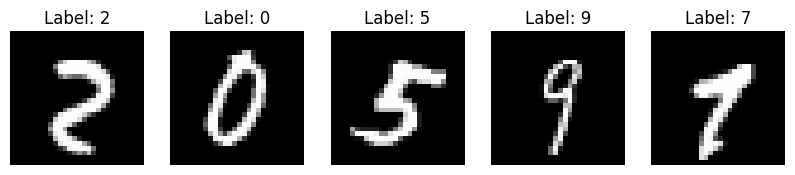

In [68]:
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i, ax in enumerate(axes):
    img, label = mnist_train[random.randint(0, len(mnist_train) - 1)]
    ax.imshow(img.squeeze(), cmap="gray")
    ax.set_title(f"Label: {label}")
    ax.axis("off")

plt.show()

# MAIN MODEL

In [69]:
# # Load processed datasets

In [70]:
labeled_images, labeled_labels = torch.load("/content/labeled_mnist.pt")

In [71]:
unlabeled_images = torch.load("/content/unlabeled_mnist.pt")

In [72]:
# Visualize some labeled samples

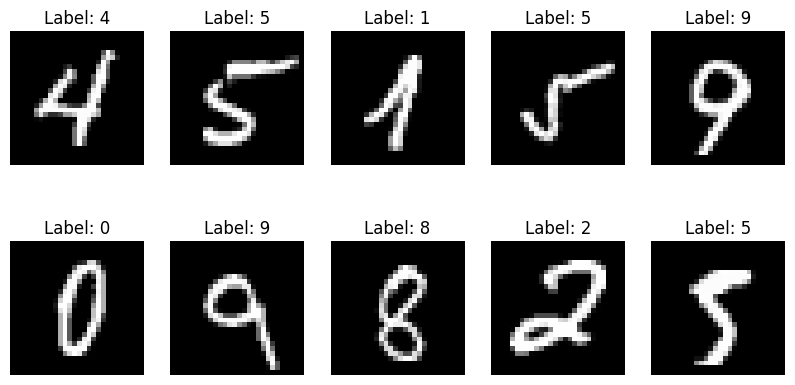

In [73]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(labeled_images[i].squeeze(), cmap="gray")
    ax.set_title(f"Label: {labeled_labels[i].item()}")
    ax.axis("off")
plt.show()

In [74]:
# Ensure batch sizes match

In [75]:
batch_size = 64

In [76]:
labeled_loader = DataLoader(TensorDataset(labeled_images, labeled_labels), batch_size=batch_size, shuffle=True, drop_last=True)


In [77]:
unlabeled_loader = DataLoader(TensorDataset(unlabeled_images), batch_size=batch_size, shuffle=True, drop_last=True)


In [78]:
# Define Generator

In [79]:
class Generator(nn.Module):
    def __init__(self, latent_dim=100):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 28 * 28),
            nn.Tanh()
        )

    def forward(self, z):
        return self.model(z).view(-1, 1, 28, 28)

In [80]:
# Define Discriminator

In [81]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.feature_extractor = nn.Sequential(
            nn.Linear(28 * 28, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU()
        )
        self.classifier = nn.Linear(256, 11)  # 10 classes + 1 for fake data

    def forward(self, x):
        features = self.feature_extractor(x.view(-1, 28 * 28))
        return self.classifier(features)

# Initialize models

In [82]:
generator = Generator()

In [83]:
discriminator = Discriminator()

In [84]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [85]:
generator.to(device)

Generator(
  (model): Sequential(
    (0): Linear(in_features=100, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=784, bias=True)
    (5): Tanh()
  )
)

In [86]:
discriminator.to(device)

Discriminator(
  (feature_extractor): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
  )
  (classifier): Linear(in_features=256, out_features=11, bias=True)
)

In [87]:
# Optimizers

In [88]:
g_optimizer = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))


In [89]:
d_optimizer = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))


In [90]:
# Loss function

In [91]:
gan_loss = nn.CrossEntropyLoss()

In [92]:
# Create results directory

In [93]:
os.makedirs("results", exist_ok=True)

In [94]:
def save_generated_images(epoch):
    """Generate and save a batch of fake images for visualization."""
    generator.eval()
    with torch.no_grad():
        z = torch.randn(16, 100, device=device)
        fake_images = generator(z).cpu()

    fig, axes = plt.subplots(4, 4, figsize=(4, 4))
    for i, ax in enumerate(axes.flat):
        ax.imshow(fake_images[i].squeeze(), cmap="gray")
        ax.axis("off")

    plt.savefig(f"results/generated_epoch_{epoch}.png")
    plt.close()
    generator.train()

In [95]:
def train_sgan(epochs=10):
    generator.train()
    discriminator.train()

    for epoch in range(epochs):
        for (real_images, real_labels), (unlabeled_images,) in zip(labeled_loader, unlabeled_loader):
            real_images, real_labels = real_images.to(device), real_labels.to(device)
            unlabeled_images = unlabeled_images.to(device)
            batch_size = real_images.size(0)

            # Generate fake images
            z = torch.randn(batch_size, 100, device=device)
            fake_images = generator(z)

            # Train Discriminator
            d_optimizer.zero_grad()

            real_preds = discriminator(real_images)
            fake_preds = discriminator(fake_images.detach())
            unlabeled_preds = discriminator(unlabeled_images)

            # Compute discriminator losses
            real_loss = gan_loss(real_preds[:, :-1], F.one_hot(real_labels, num_classes=10).float())
            fake_loss = gan_loss(fake_preds[:, -1].unsqueeze(1), torch.zeros((batch_size, 1), device=device))
            unlabeled_loss = gan_loss(unlabeled_preds[:, -1].unsqueeze(1), torch.zeros((batch_size, 1), device=device))

            d_loss = real_loss + fake_loss + unlabeled_loss
            d_loss.backward()
            d_optimizer.step()

            # Train Generator
            g_optimizer.zero_grad()
            fake_preds = discriminator(fake_images)

            # Instead of training the generator to minimize "fake class,"
            # we push it towards being classified as real classes
            g_loss = gan_loss(fake_preds[:, :-1], torch.ones_like(fake_preds[:, :-1]) / 10)
            g_loss.backward()
            g_optimizer.step()

        print(f"Epoch {epoch+1}/{epochs}, D Loss: {d_loss.item():.4f}, G Loss: {g_loss.item():.4f}")
        save_generated_images(epoch+1)

    # Save models
    torch.save(generator.state_dict(), "results/generator.pth")
    torch.save(discriminator.state_dict(), "results/discriminator.pth")
    print("Training complete! Models saved.")

In [96]:
# Start Training

In [97]:
train_sgan(epochs=10)

Epoch 1/10, D Loss: 0.6812, G Loss: 2.3026
Epoch 2/10, D Loss: 0.3689, G Loss: 2.3026
Epoch 3/10, D Loss: 0.3223, G Loss: 2.3026
Epoch 4/10, D Loss: 0.3476, G Loss: 2.3026
Epoch 5/10, D Loss: 0.3572, G Loss: 2.3026
Epoch 6/10, D Loss: 0.2376, G Loss: 2.3026
Epoch 7/10, D Loss: 0.2452, G Loss: 2.3026
Epoch 8/10, D Loss: 0.1042, G Loss: 2.3026
Epoch 9/10, D Loss: 0.1540, G Loss: 2.3026
Epoch 10/10, D Loss: 0.2011, G Loss: 2.3026
Training complete! Models saved.


# Evalution of the model

In [98]:
# Load trained models

In [99]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [100]:
generator = torch.load("results/generator.pth", map_location=device)

In [101]:
discriminator = torch.load("results/discriminator.pth", map_location=device)


In [102]:
# Initialize models before loading state_dict

In [103]:
generator_model = Generator().to(device)

In [104]:
discriminator_model = Discriminator().to(device)

In [105]:
generator_model.load_state_dict(torch.load("results/generator.pth", map_location=device))


<All keys matched successfully>

In [106]:
discriminator_model.load_state_dict(torch.load("results/discriminator.pth", map_location=device))


<All keys matched successfully>

In [107]:
generator_model.eval()

Generator(
  (model): Sequential(
    (0): Linear(in_features=100, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=784, bias=True)
    (5): Tanh()
  )
)

In [108]:
discriminator_model.eval()

Discriminator(
  (feature_extractor): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
  )
  (classifier): Linear(in_features=256, out_features=11, bias=True)
)

In [109]:
# Generate synthetic images

In [110]:
z = torch.randn(16, 100, device=device)

In [111]:
fake_images = generator_model(z).cpu().detach()

In [112]:
# Load real images

In [113]:
labeled_images, labeled_labels = torch.load("/content/labeled_mnist.pt")

In [114]:
real_images = labeled_images[:16].cpu().detach()

In [115]:
# Compare real and generated images

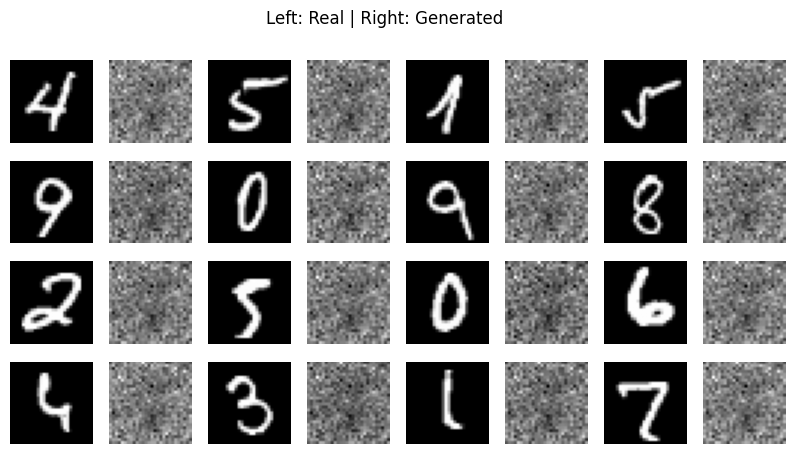

In [116]:
fig, axes = plt.subplots(4, 8, figsize=(10, 5))
for i in range(16):
    axes[i//4, 2*(i%4)].imshow(real_images[i].squeeze(), cmap='gray')
    axes[i//4, 2*(i%4)].axis('off')
    axes[i//4, 2*(i%4)+1].imshow(fake_images[i].squeeze(), cmap='gray')
    axes[i//4, 2*(i%4)+1].axis('off')

plt.suptitle("Left: Real | Right: Generated")
plt.show()

In [117]:
# Evaluate Discriminator

In [118]:
real_preds = discriminator_model(real_images.to(device))

In [119]:
fake_preds = discriminator_model(fake_images.to(device))

In [120]:
print("Real Image Predictions:\n", real_preds.softmax(dim=1)[:, :-1].mean(dim=0))
print("\nFake Image Predictions:\n", fake_preds.softmax(dim=1)[:, -1].mean().item())


Real Image Predictions:
 tensor([0.1197, 0.1031, 0.0685, 0.0658, 0.1015, 0.2012, 0.0657, 0.0654, 0.0657,
        0.1248], device='cuda:0', grad_fn=<MeanBackward1>)

Fake Image Predictions:
 0.10253884643316269


In [121]:
# Save generated images and evaluation results

In [122]:
torch.save(fake_images, "generated_images.pth")

In [123]:
results = {"real_preds": real_preds.cpu().detach(), "fake_preds": fake_preds.cpu().detach()}


In [124]:
with open("discriminator_results.pkl", "wb") as f:
    pickle.dump(results, f)

# Dash App for Visualization

In [125]:
# Load MNIST dataset

In [126]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [127]:
def get_sample_image(index):
    """Convert a sample image to base64 for displaying in Dash."""
    fig, ax = plt.subplots()
    ax.imshow(train_images[index], cmap='gray')
    ax.axis('off')
    buf = BytesIO()
    plt.savefig(buf, format='png')
    buf.seek(0)
    encoded_image = base64.b64encode(buf.getvalue()).decode('utf-8')
    plt.close()
    return f'data:image/png;base64,{encoded_image}'

In [128]:
# Generate a DataFrame for visualization

In [129]:
labels_df = pd.DataFrame({'Label': train_labels})

In [130]:
# Initialize Dash app

In [131]:
app = dash.Dash(__name__)

In [132]:
app.layout = html.Div([
    html.H1("MNIST Dataset Dashboard"),

    html.Div([
        html.Label("Select Sample Image Index:"),
        dcc.Slider(0, len(train_images) - 1, step=1, value=random.randint(0, len(train_images) - 1),
                   id='image-slider')
    ]),

    html.Div([html.Img(id='image-display', style={'width': '200px', 'height': '200px'})]),

    html.H3("Label Distribution"),
    dcc.Graph(id='label-distribution'),

    html.Label("Select Number of GAN-Generated Images:"),
    dcc.Slider(1, 10, step=1, value=5, id='gan-slider'),

    html.Div(id='gan-images', style={'display': 'flex', 'flex-wrap': 'wrap'})
])

@app.callback(
    Output('image-display', 'src'),
    Input('image-slider', 'value')
)
def update_image(index):
    return get_sample_image(index)

@app.callback(
    Output('label-distribution', 'figure'),
    Input('image-slider', 'value')
)
def update_distribution(_):
    fig = px.histogram(labels_df, x='Label', nbins=10, title='Label Distribution')
    return fig

@app.callback(
    Output('gan-images', 'children'),
    Input('gan-slider', 'value')
)
def generate_gan_images(n):
    return [html.Img(src=get_sample_image(random.randint(0, len(train_images) - 1)),
                     style={'width': '100px', 'height': '100px', 'margin': '5px'})
            for _ in range(n)]

In [133]:
if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>